<img src="logo_UNSAM.jpg" align="right" width="150">

# *TS8 - Filtrado digital lineal de ECG*

### Autoras: Catalina Gonzalez Araujo y Lola Pampin
### Docentes: Mariano Llamedo Soria, Francisco Hernan Ledesma y David Ezequiel Benoit

# I. **Introducción**

## <u> Procesamiento digital del *ECG* </u> 

El electrocardiograma (*ECG*) es una señal biomédica que refleja la actividad electrica del corazón durante cada ciclo cardíaco. Su análisis permite identificar patologías, alteraciones del ritmo cardíaco y variaciones en la conducción eléctrica. Los principales componentes de un latido son:

- **Onda P**: representa la despolarización auricular (las cavidades superiores del corazón se activan eléctricamente). Es de baja amplitud ($ \approx 0.1 - 0.2 mV $) y relativamente lenta (duracion $\approx 80 ms $).
- **Complejo QRS**: corresponde a la despolarización ventricular (activación eléctrica de los ventrículos, las cavidades encargadas de bombear sangre al cuerpo). Es el componente de mayor energía y rapidez en el ECG (duración $\approx 80 - 120 ms$). Su pendiente pronunciada requiere preservar componentes de frecuencia relativamente altas.
- **Onda T**: asociada a la repolarización ventricular (luego de activarse, las células vuelven a su voltaje "de reposo"). Es más ancha que la onda P y su contenido espectral es de menor frecuencia que el QRS.

Durante mediciones reales, especialmente en pruebas de esfuerzo, la señal suele contaminarse con diversas fuentes de ruido que modifican su morfología. Por este motivo, el **filtrado digital** constituye una herramienta fundamental para recuperar la informacion relevante de la señal, preservando la forma típica de los latidos y su nivel isoeléctrico (potencial de referencia donde el voltaje es idealmente cero).

El procesamiento digital se basa en la representación muestreada de la señal y en la aplicación de transformaciones en el dominio temporal o frecuencial para atenuar interferencias sin alterar la forma característica del latido.

## <u> Contenido espectral del *ECG* y consideraciones prácticas </u>

El *ECG* es una señal con espectro conocido, cuyo contenido útil se encuentra aproximadamente en: 

- $0.5 - 40 Hz$: energía principal de ondas P, QRS y T.

- $50 Hz$: interferencia de red electrica.

- $> 40 - 45 Hz$: ruido muscular (*EMG*) y artefactos de movimiento. 
Las principales componentes del *ECG* tienen ontenido espectral relativamente actado: 

Conservar la morfología del QRS y las ondas P y T requiere diseñar filtros que supriman las interferencias (baja y alta frecuencia, y ruido de línea) sin distorcionar las características temporales y espectrales de la señal útil. 

## <u> Fuentes principales de contaminación en el *ECG* </u>

En registros clínicos reales aparecen tres interferencias dominantes: 

1. **Derivada de linea base (*baseline wander*)**: oscilaciones lentas ($< 0.5 $) provocadas por la respiración, movimientos del paciente o cambios en la impedancia eléctrica de los electrodos. Desplaza el nivel isoeléctrico, dificultando medir amplitudes. 
2. **Ruido muscular (*EMG*)**: generado por la actividad de los músculos adyacentes, posee un espectro amplio y contribuye principalmente en alta frecuencia (banda ancha $ 40 - 200 Hz $). Durante esfuerzo físico su presencia es intensa y variable.
3. **Artefactos por movimiento de electrodos**: cambios abruptos en el contacto que introducen transitorios y contenido de alta frecuencia, pudiendo deformar el complejo QRS y saturar el registro.

Cada una de estas interferencias ocupa regiones espectrales distintas, lo que fundamenta el uso de filtros *pasa-banda* acotados o combinaciones de filtros *pasa-alto* y *pasa-bajo*, para preservar el rango de interés del *ECG*. 

## <u> Banda útil del *ECG* </u>

Para señales de superficie típicas se considera adecuada la banda: $ 0.5 Hz \leq frecuencia \leq 40 Hz $.

Esta banda conserva la energía principal de P, QRS y T, atenúa la deriva de línea de base (por debajo de $ 0.5 Hz $) y reduce el ruido muscular y artefactos de alta frecuencia. En pruebas de esfuerzo puede observarse contenido útil ligeramente superior (hasta $ 80 - 100 Hz $), pero la banda clásica $ 0.5 - 40 Hz $ suele ser la referencia para obtener trazos suaves y clínicamente interpretables. 

## <u> Concepto de *ripple* </u>

Al diseñar filtros, especialmente en el dominio frecuencial, aparece el consepto de **ripple**: 

- Es la variación no deseada de la ganancia dentro de una banda (de paso o se rechazo).
- En la banda de paso, el ripple implica que algunas frecuencias se amplifican o atenúan ligeramente.
- En la banda de rechazo, el ripple significa que la atenuación no es constante, sino que oscila alrededor del nivel deseado.

Hay filtros que permiten controlar y limitar el ripple para obtener transiciones más abruptas con orden mayor. 

## <u> Plantilla de diseño </u>

Para diseñar un filtro se establecen especificaciones expresadas mediante una **plantilla** (*mask*): 

- **Banda de paso**: frecuencias útiles de la señal.
- **Banda de rechazo**: frecuencias donde se exige una atenuación mínima para eliminar interferencias:
    - $< 0.5 Hz$ (deriva del nivel isoeléctrico).
    - $40 Hz$ (ruido *EMG*, artefactos).
    - $50 Hz$ (línea eléctrica).
- **Ripple admisible en banda**: los valores tipicos son $0.1 - 1 dB $ en banda de paso y $20 - 60 dB$ de atenuacion en banda de rechazo.
- **Frecuencias de transición**: separan las bandas de paso y las de rechazo. Cuanto mas estrechos sean estos bordes, mayor sera el orden del filtro. 
- **Atenuación en banda de paso**: es el máximo error permitido dentro de la banda donde el filtro debe dejar pasar la señal. 
- **Atenuación en banda de rechazo**: es la mínima atenuación requerida para suprimir interferencias.

La respuesta en frecuencia final debe ajustarse a estos valores para garantizar que la señal filtrada sea representativa y clínicamente útil. 

## <u> Tipos de filtros </u>

### *FIR* (Finite Impulse Response)

Un **filtro FIR** (*respuesta finita al impulso*) es un filtro digital cuya respuesta al impulso dura un número finito de muestras. No utiliza realimentación, por lo que siempre es estable. 

La característica más importante es que puede diseñarse con fase lineal, lo que significa que no altera la forma temporal de la señal. Por este motivo, los *FIR* son ideales cuando se necesita máxima fidelidad en la forma de onda, aunque a veces requieren órdenes más altos para lograr transiciones bruscas. 

#### Métodos de diseño *FIR*

1. **Ventanas (Hamming, Blackman, etc.)**
    - Se parte de la respuesta ideal (por ejemplo un *pasa-banda* rectangular en frecuencia).
    - Se multiplica por una ventana que suaviza los bordes.
    - Ventanas diferentes producen distintos compromisos entre ancho del lóbulo principal y atenuación lateral.
    - Es el método más simple, pero no optimiza el error en forma estricta.
2. **Mínimos cuadrados (*Least Squares*)**
    - Minimiza el error cuadrático promedio entre la respuesta deseada e ideal.
    - Produce filtros con buena aproximación global en banda de paso y de rechazo.
    - No controla de forma estricta los máximos errores (no es equiripple).
3. **Equiripple (*Parks - McClellan / Remez*)**
    - Minimiza el error máximo en cada banda.
    - El ripple es uniforme en cada banda.
    - Produce el filtro de orden mínimo que cumple la plantilla.
    - Ideal cuando se quiere precisión y eficiencia. 

### *IIR* (Infinite Impulse Response)

Un **filtro IIR** (*respuesta infinita al impulso*) es un filtro digital que utiliza realimentación interna, lo que hace que su respuesta al impulso teóricamente dure para siempre (aunque en la práctica de atenúe). Gracias a esa realimentación, los *IIR* pueden lograr transiciones muy rápidas con orden mucho menor que un *FIR* equivalente. 

Su desventaja es que presentan fase no lineal, lo que puede deformar la señal. Esta distorsión puede corregirse usando técnicas de *python* como *filtfilt*. 

Conviene utilizarlos cuando se busca eficiencia computacional o cuando se requiere un filtro de orden bajo. 

#### Métodos de diseño *IIR*

1. **Butterworth**
    - Máxima planicidad en banda de paso.
    - Sin ripple.
    - Transición suave y orden mayor para especificaciones estrictas.
    - Ideal cuando lo más importante es evitar el ripple y suavizar el trazo.
2. **Chebyshev Tipo I**
    - Ripple en banda de paso, banda de rechazo libre de ripple.
    - Transición más abrupta que Butterworth para igual orden.
    - Útil cuando se tolera un poco de ripple para obtener filtros más eficientes.
3. **Chebyshev Tipo II**
    - Sin ripple en banda de paso.
    - Ripple en banda de rechazo.
    - Buena opción cuando la banda de paso debe ser muy limpia.
4. **Elíptico / Cauer**
    - Ripple en ambas bandas.
    - Transiciones más abruptas.
    - Es el más eficiente en términos de orden, pero puede introducir distorsión si las especificaciones son agresivas. 

# II. **Desarrollo**
## *<u>Punto a</u>*

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal as sig
from pytc2.sistemas_lineales import plot_plantilla
import scipy.io as sio

# %% 1) PLANTILLA DE DISEÑO - PASABANDA DIGITAL

fs = 1000  # [Hz]
wp = (0.8, 35)
ws = (0.1, 40)

# Atenuaciones (divididas entre 2 porque se filtra forward + backward)
alpha_p = 0.5     # dB
alpha_s = 20      # dB

## *<u>Punto b</u>*

Para diseñar la plantilla de filtros digitales se ssiguó un procedimiento fundamental tanto en la fisiología del *ECG* como en factores técnicos del filtrado digital. El objetivo fue obtener una señal cuya morfología sea comparable al latido promedio, con suavidad de los trazoz y nivel isoeléctrico nulo. 

Los valores de la plantilla se obtuvieron analizando el contenido espectral del *ECG* y las características del ruido presente. Se seleccionaron las frecuencias de corte para preservar la banda fisiológica del *ecg* (a partir de lo obtenido en la *TS5* que fue $31.9 Hz$), eliminando la deriva de línea base ($< 0.5 Hz$) y el ruido muscular ($ > 40 Hz$). Se definieron rizados de $0.5 dB$ en banda pasante y $20 dB$ de atenuacion en banda de rechazo, garantizando trazos suaves, nivel isoeléctrico nulo y una señal adecuadamente comparable con el latido promedio. 


## *<u>Punto c</u>*
### Filtros *IIR*

In [2]:
# %% 2) DISEÑO IIR (BUTTER - CHEBY1 - CHEBY2 - CAUER)

mi_sos_butt  = sig.iirdesign(wp, ws, gpass=alpha_p, gstop=alpha_s, ftype='butter', fs=fs, output='sos')
mi_sos_cauer = sig.iirdesign(wp, ws, gpass=alpha_p, gstop=alpha_s, ftype='ellip', fs=fs, output='sos')
mi_sos_cheb1 = sig.iirdesign(wp, ws, gpass=alpha_p, gstop=alpha_s, ftype='cheby1', fs=fs, output='sos')
# mi_sos_cheb2 = sig.iirdesign(wp, ws, gpass=alpha_p, gstop=alpha_s, ftype='cheby2', fs=fs, output='sos')

# Elegimos dos para graficar
mi_sos1 = mi_sos_cauer
tipo1 = "Cauer"

mi_sos2 = mi_sos_cheb1
tipo2 = "Cheby 1"

# Respuesta en frecuencia
w1, h1 = sig.sosfreqz(mi_sos1, worN=2048, fs=fs)
w2, h2 = sig.sosfreqz(mi_sos2, worN=2048, fs=fs)

# Evitar log10(0) → reemplazamos ceros por un valor muy cercano a cero --> es para que no tire error en el jupyter
h1_mag = np.abs(h1)
h1_mag[h1_mag == 0] = 1e-20

h2_mag = np.abs(h2)
h2_mag[h2_mag == 0] = 1e-20

# Fase
fase1 = np.unwrap(np.angle(h1))
w_rad1 = w1 / (fs/2) * np.pi
gd1 = -np.diff(fase1) / np.diff(w_rad1)

fase2 = np.unwrap(np.angle(h2))
w_rad2 = w2 / (fs/2) * np.pi
gd2 = -np.diff(fase2) / np.diff(w_rad2)

1) <font color=red><u> **Cauer</u><font>**

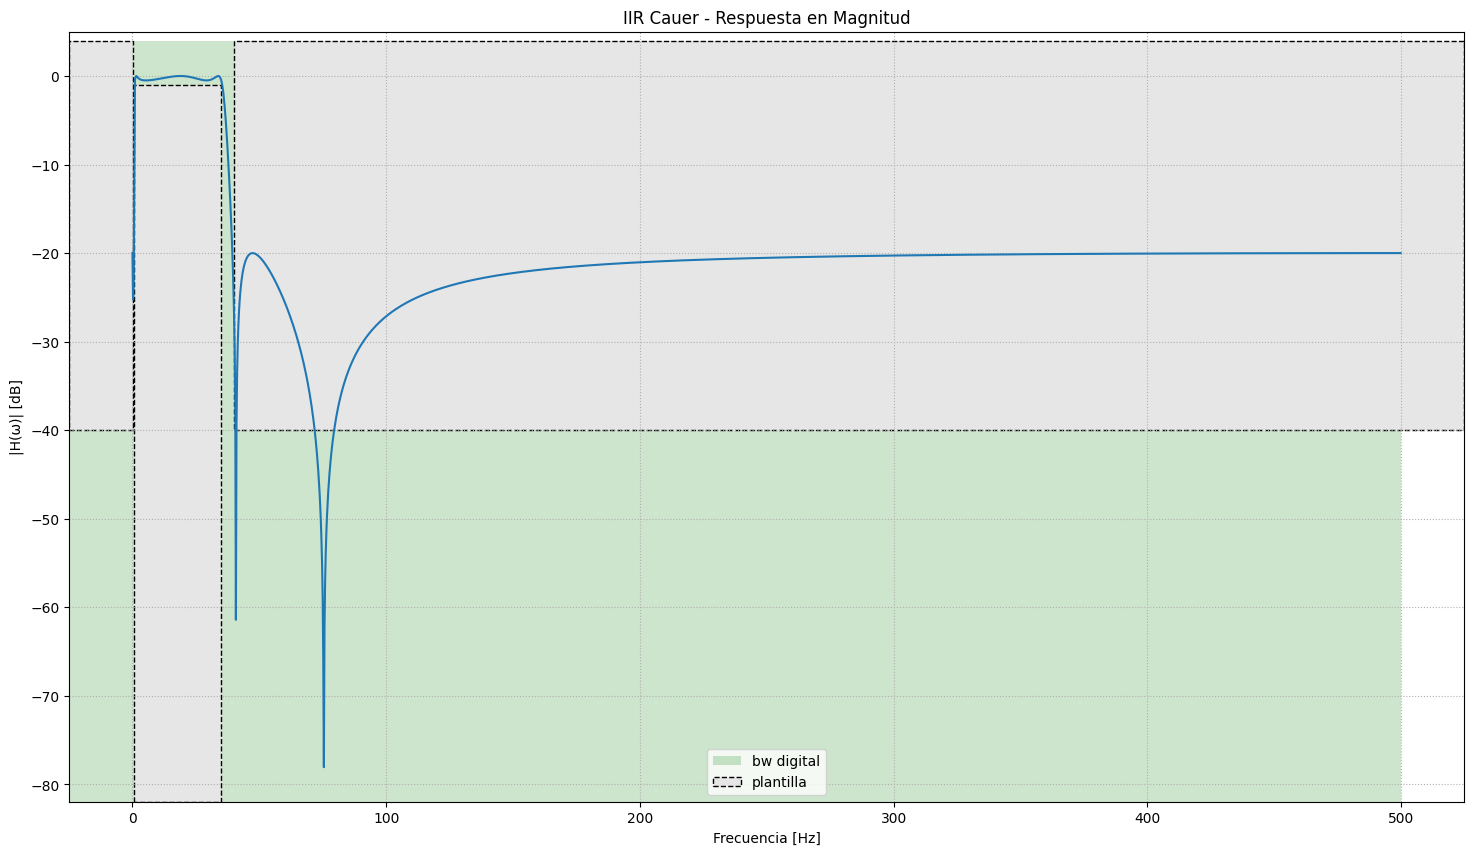

<Figure size 640x480 with 0 Axes>

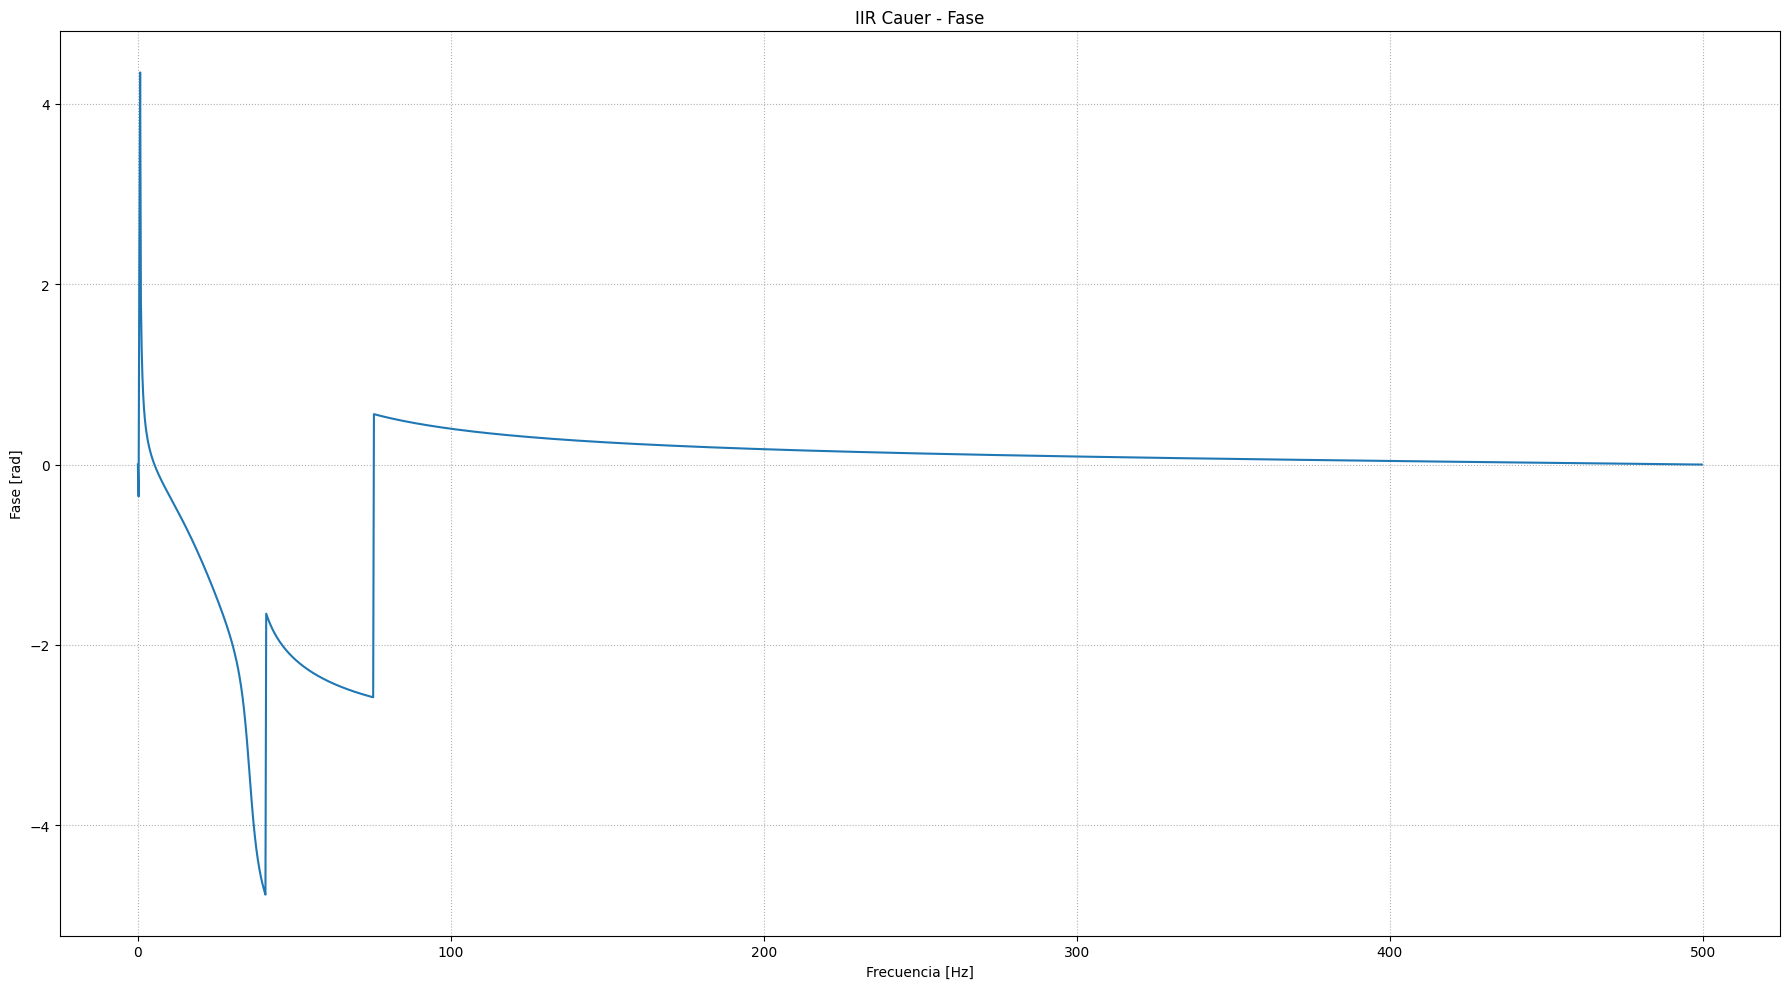

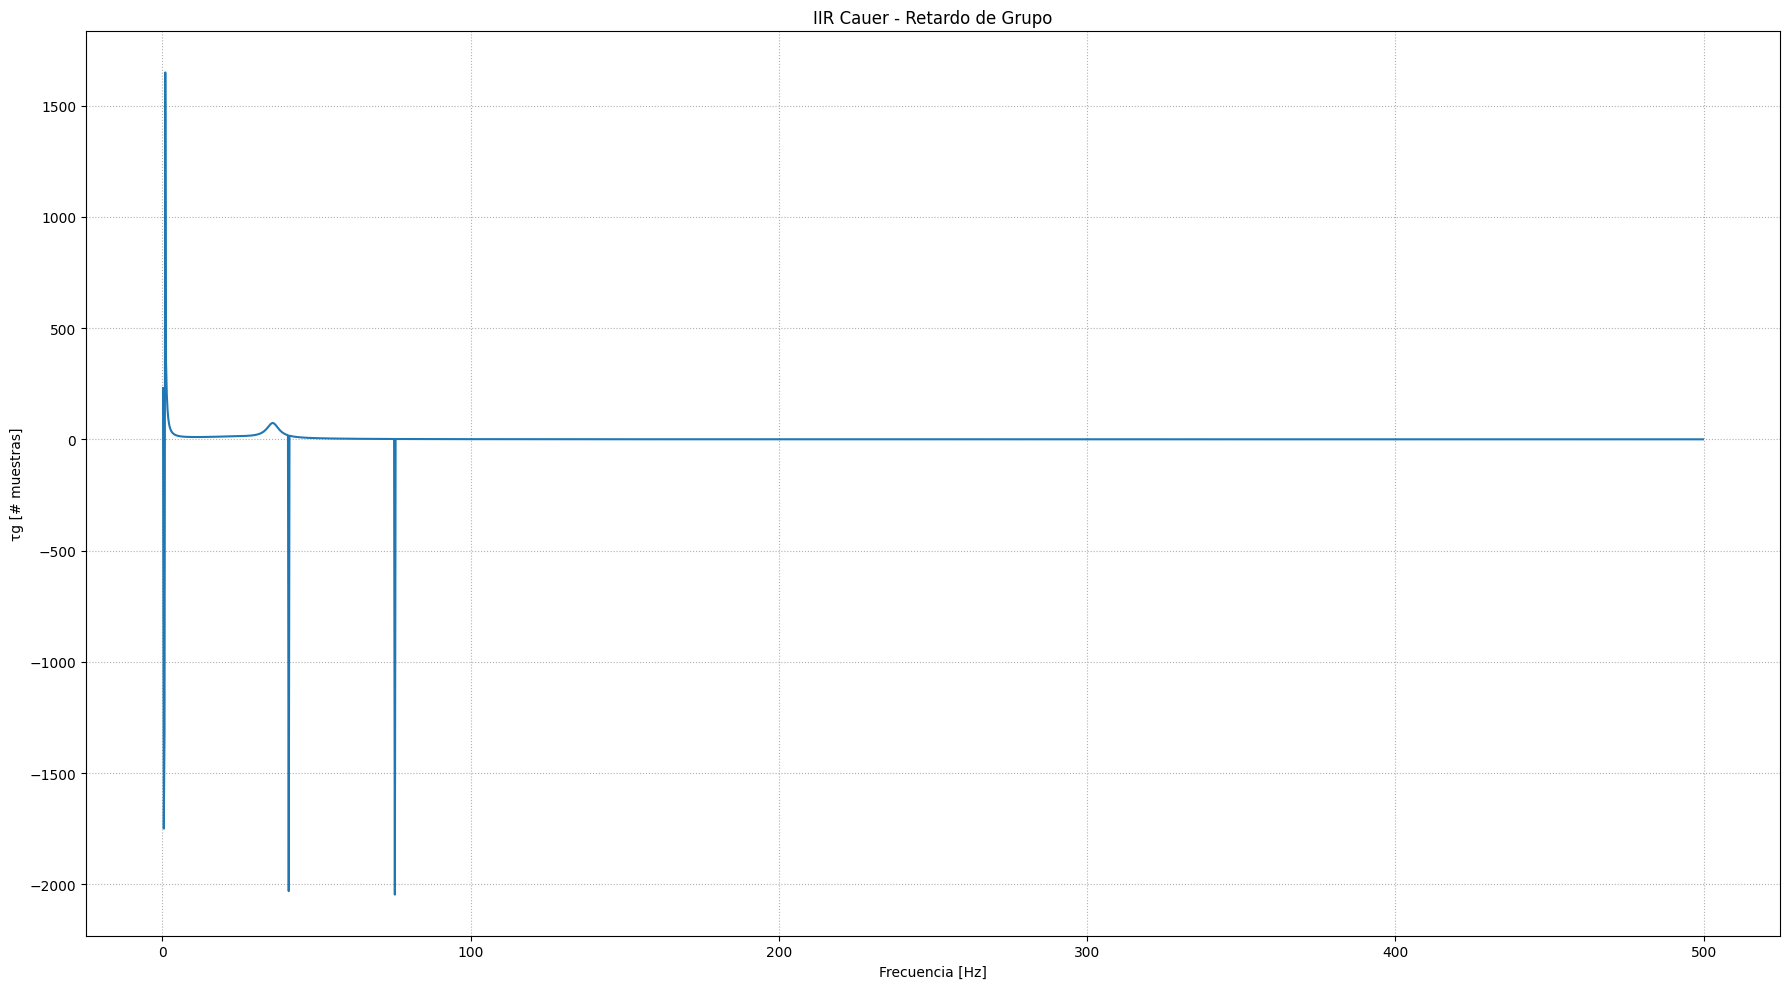

In [3]:
# %% GRAFICOS 
# CAUER
plt.figure(figsize=(18,10))
plt.plot(w1, 20*np.log10(h1_mag))
plt.title(f'IIR {tipo1} - Respuesta en Magnitud')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('|H(ω)| [dB]')
plt.grid(True, which='both', ls=':')
plot_plantilla('bandpass', wp, alpha_p*2, ws, alpha_s*2, fs)
plt.tight_layout() 
plt.show()

plt.figure(figsize=(18,10))
plt.plot(w1, fase1)
plt.title(f'IIR {tipo1} - Fase')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Fase [rad]')
plt.grid(True, which='both', ls=':')
plt.tight_layout() 
plt.show()

plt.figure(figsize=(18,10))
plt.plot(w1[1:], gd1)
plt.title(f'IIR {tipo1} - Retardo de Grupo')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('τg [# muestras]')
plt.grid(True, which='both', ls=':')
plt.tight_layout() 
plt.show()

2) <font color=red><u> **Chebyshev tipo I</u><font>**

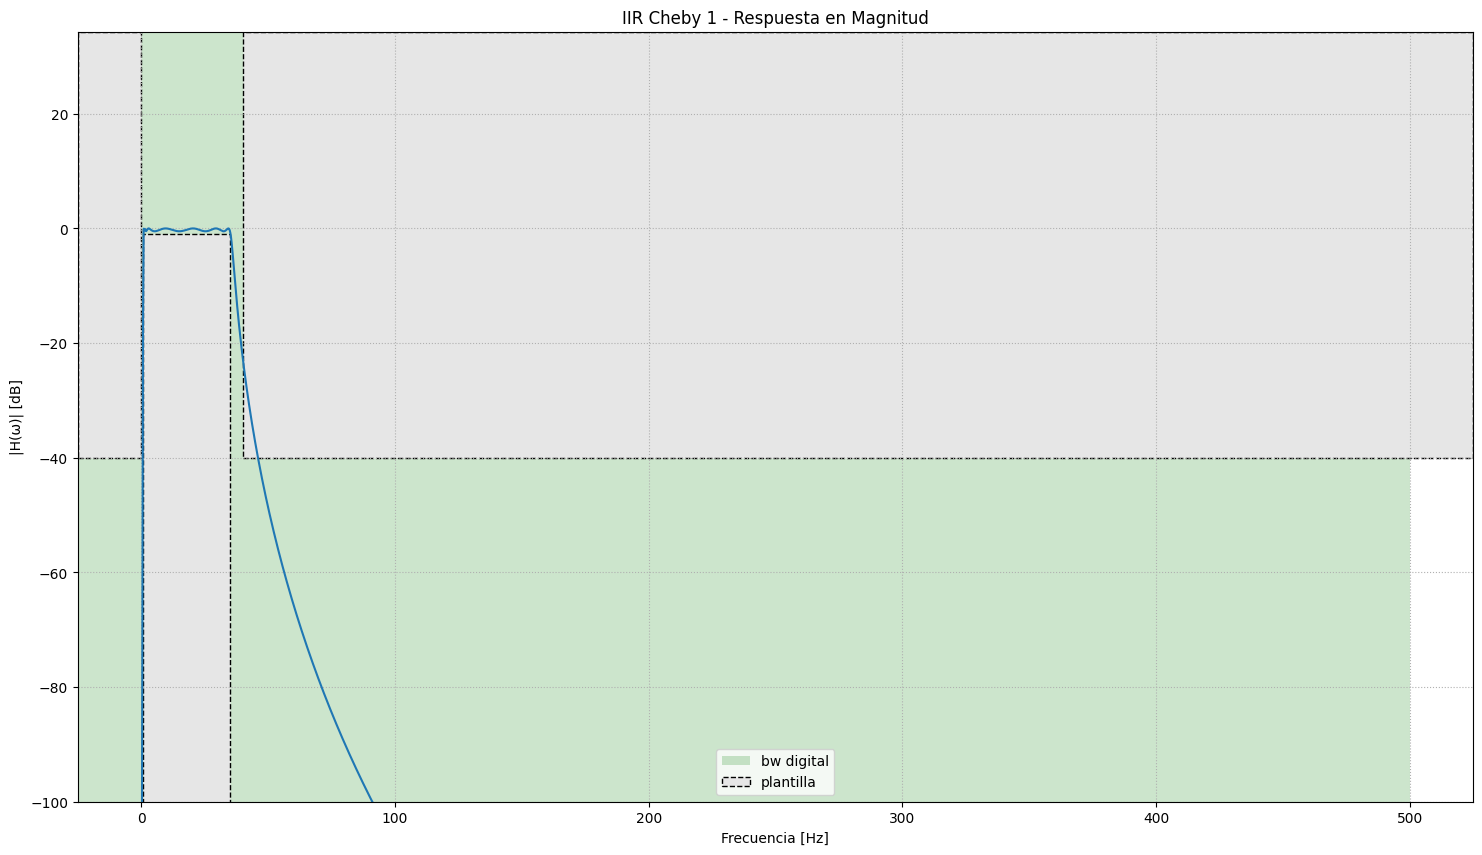

<Figure size 640x480 with 0 Axes>

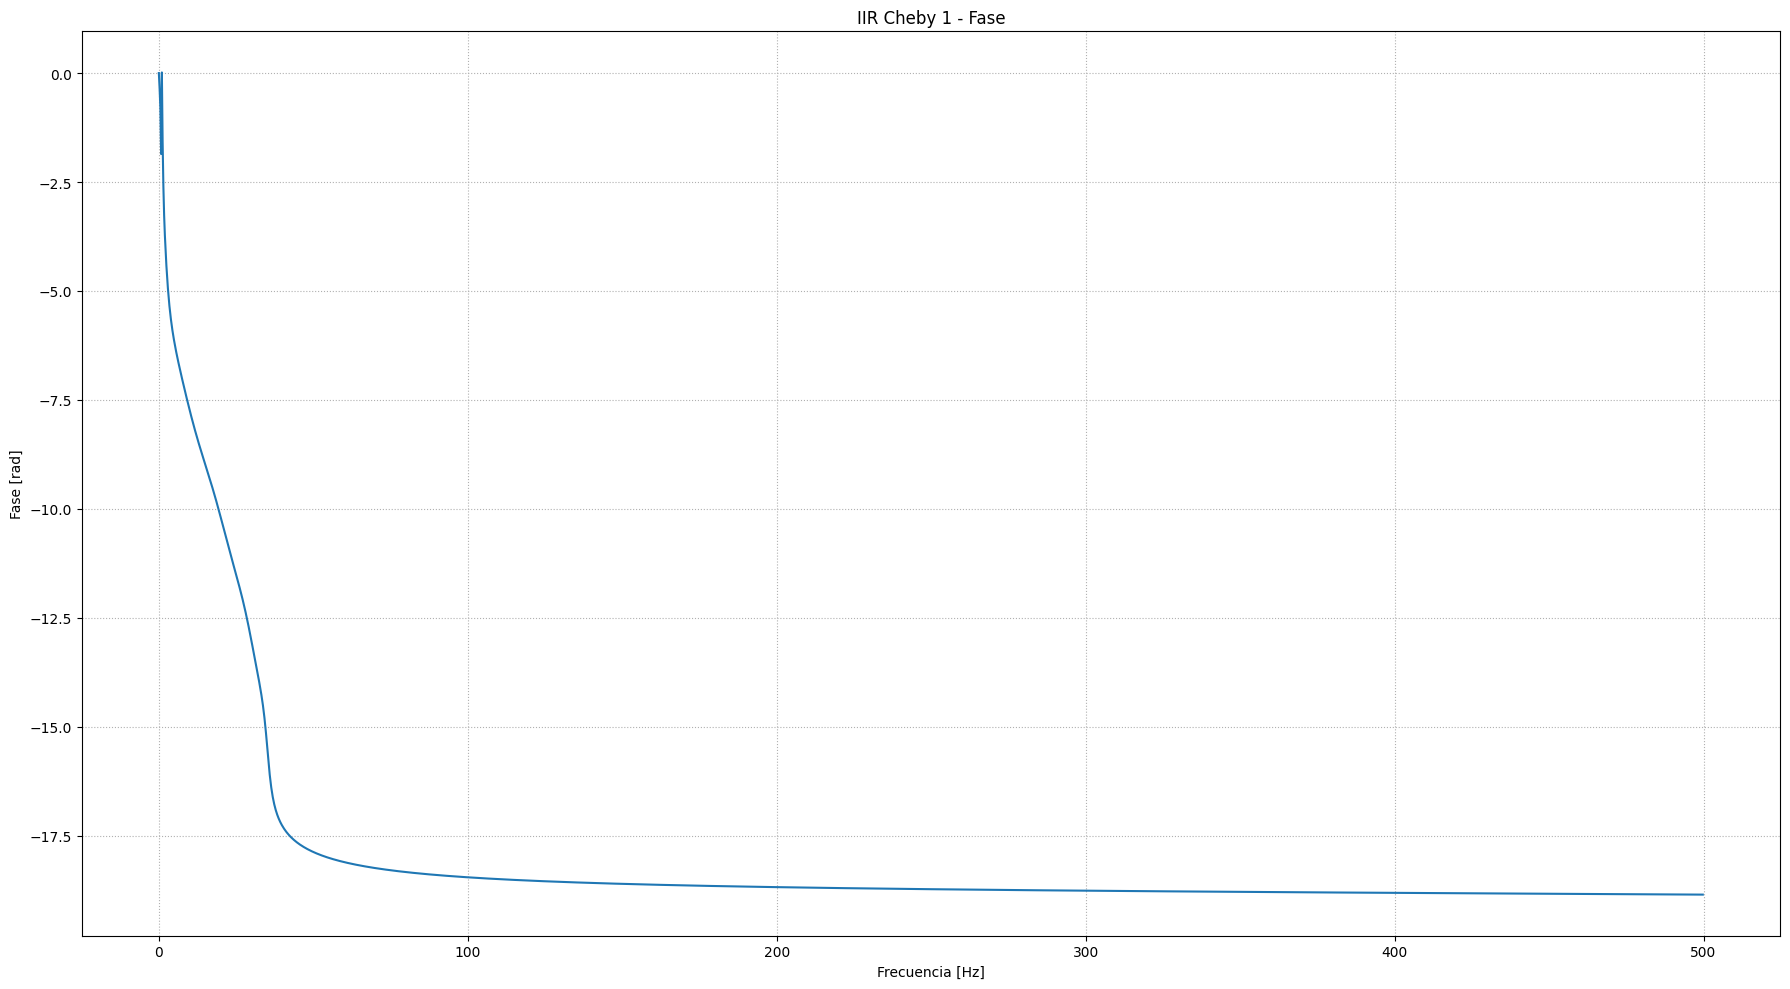

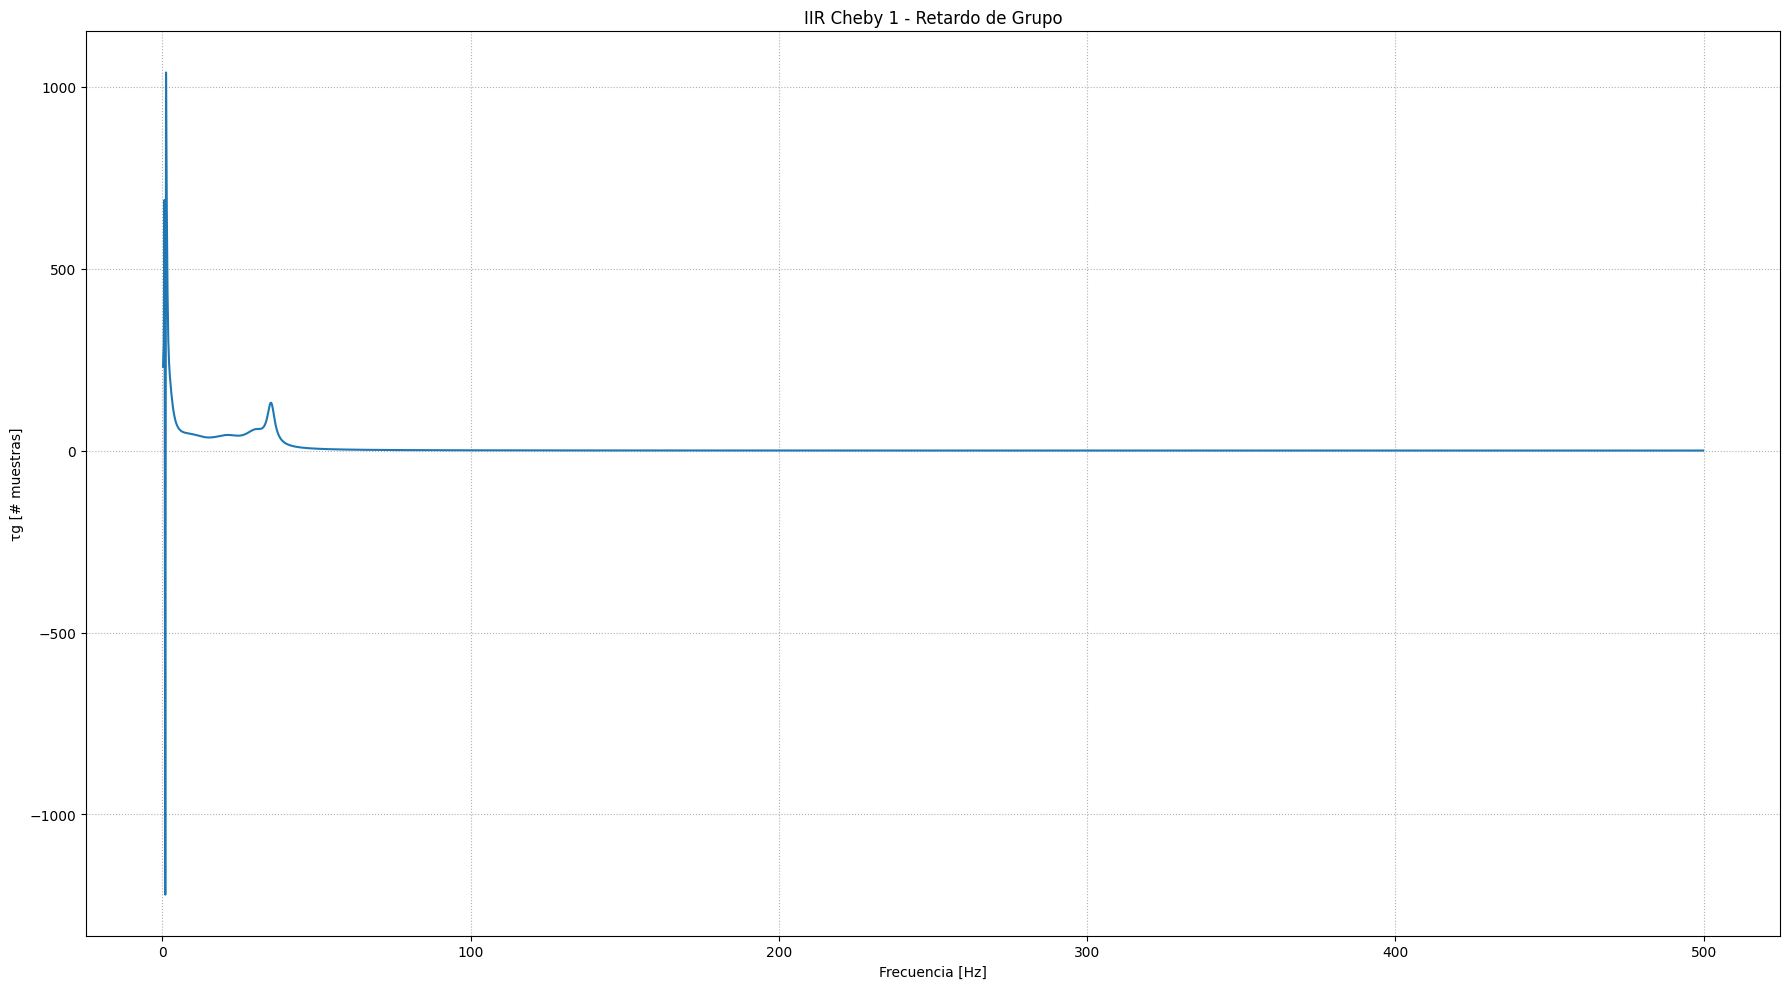

In [4]:
# CHEBY 1
plt.figure(figsize=(18,10))
plt.plot(w2, 20*np.log10(h2_mag))
plt.title(f'IIR {tipo2} - Respuesta en Magnitud')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('|H(ω)| [dB]')
plt.grid(True, which='both', ls=':')
plot_plantilla('bandpass', wp, alpha_p*2, ws, alpha_s*2, fs)
plt.tight_layout() 
plt.show()

plt.figure(figsize=(18,10))
plt.plot(w2, fase2)
plt.title(f'IIR {tipo2} - Fase')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Fase [rad]')
plt.grid(True, which='both', ls=':')
plt.tight_layout() 
plt.show()

plt.figure(figsize=(18,10))
plt.plot(w2[1:], gd2)
plt.title(f'IIR {tipo2} - Retardo de Grupo')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('τg [# muestras]')
plt.grid(True, which='both', ls=':')
plt.tight_layout() 
plt.show()

### Filtros *FIR*

In [5]:
# %% 2) DISEÑO FIR (FIRWIN2 y FIRLS)

frecuencias = np.array([0, 0.1, 0.8, 35, 35.7, fs/2])
deseado     = np.array([0, 0, 1, 1, 0, 0])

# FIR con ventana rectangular
numtaps = 1001
fir_win = sig.firwin2(numtaps, frecuencias, deseado, fs=fs, window='boxcar')
retardo = (numtaps - 1)//2

# FIR Least-Squares
numtaps_ls = 2001  # impar
fir_ls = sig.firls(numtaps_ls, frecuencias, deseado, fs=fs)
retardo_ls = (numtaps_ls - 1)//2

# Respuesta en frecuencia
w_fir, h_fir = sig.freqz(fir_win, worN=2048, fs=fs)
fase_fir = np.unwrap(np.angle(h_fir))
gd_fir = -np.diff(fase_fir) / np.diff(w_fir/fs*np.pi)

w_ls, h_ls = sig.freqz(fir_ls, worN=2048, fs=fs)
fase_ls = np.unwrap(np.angle(h_ls))
gd_ls = -np.diff(fase_ls) / np.diff(w_ls/fs*np.pi)

1) <font color=red><u> **FIR con ventana rectangular</u><font>**

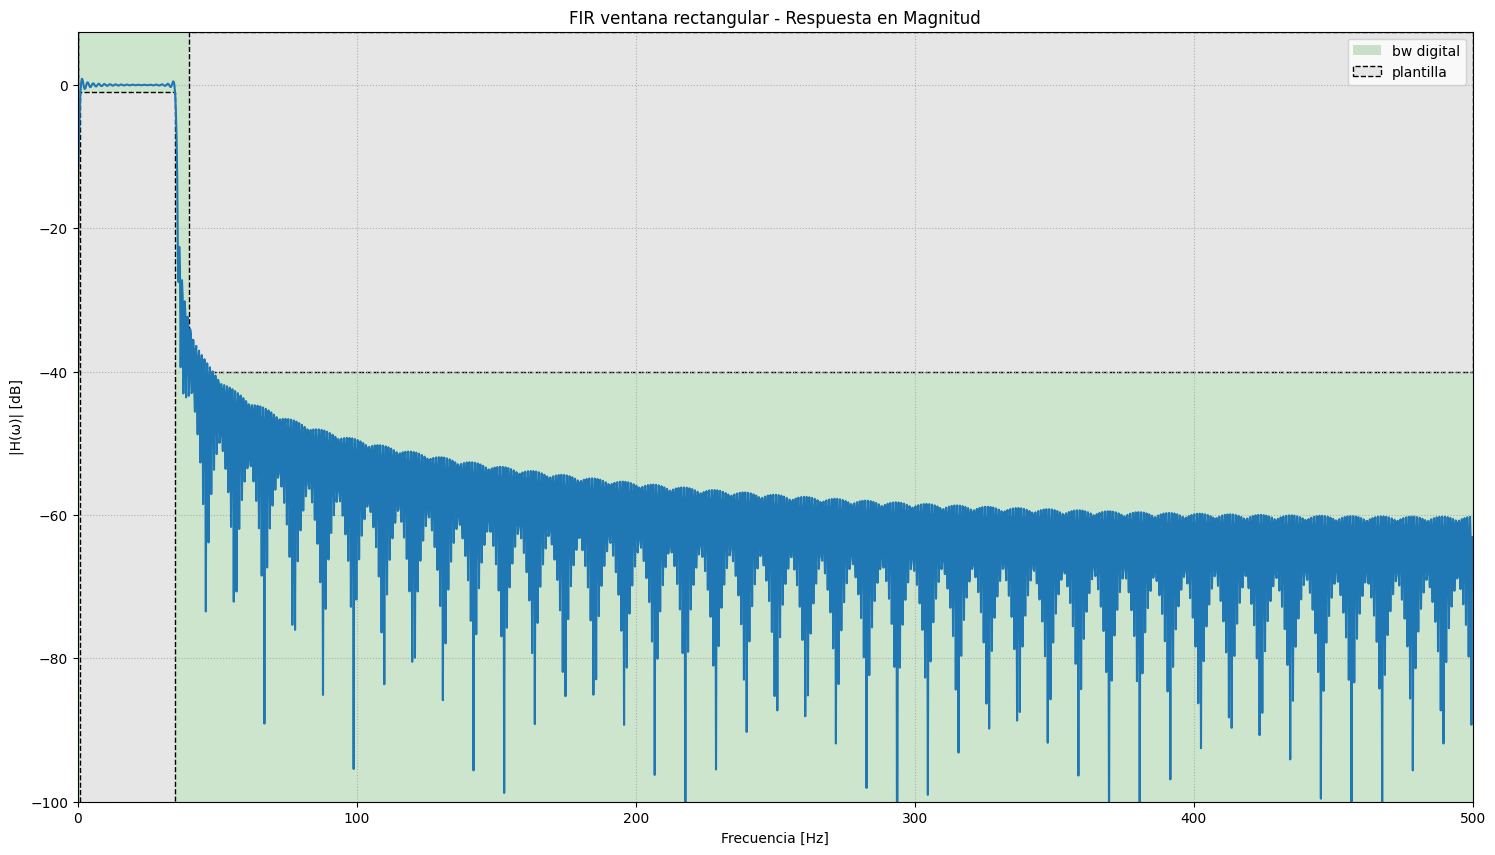

<Figure size 640x480 with 0 Axes>

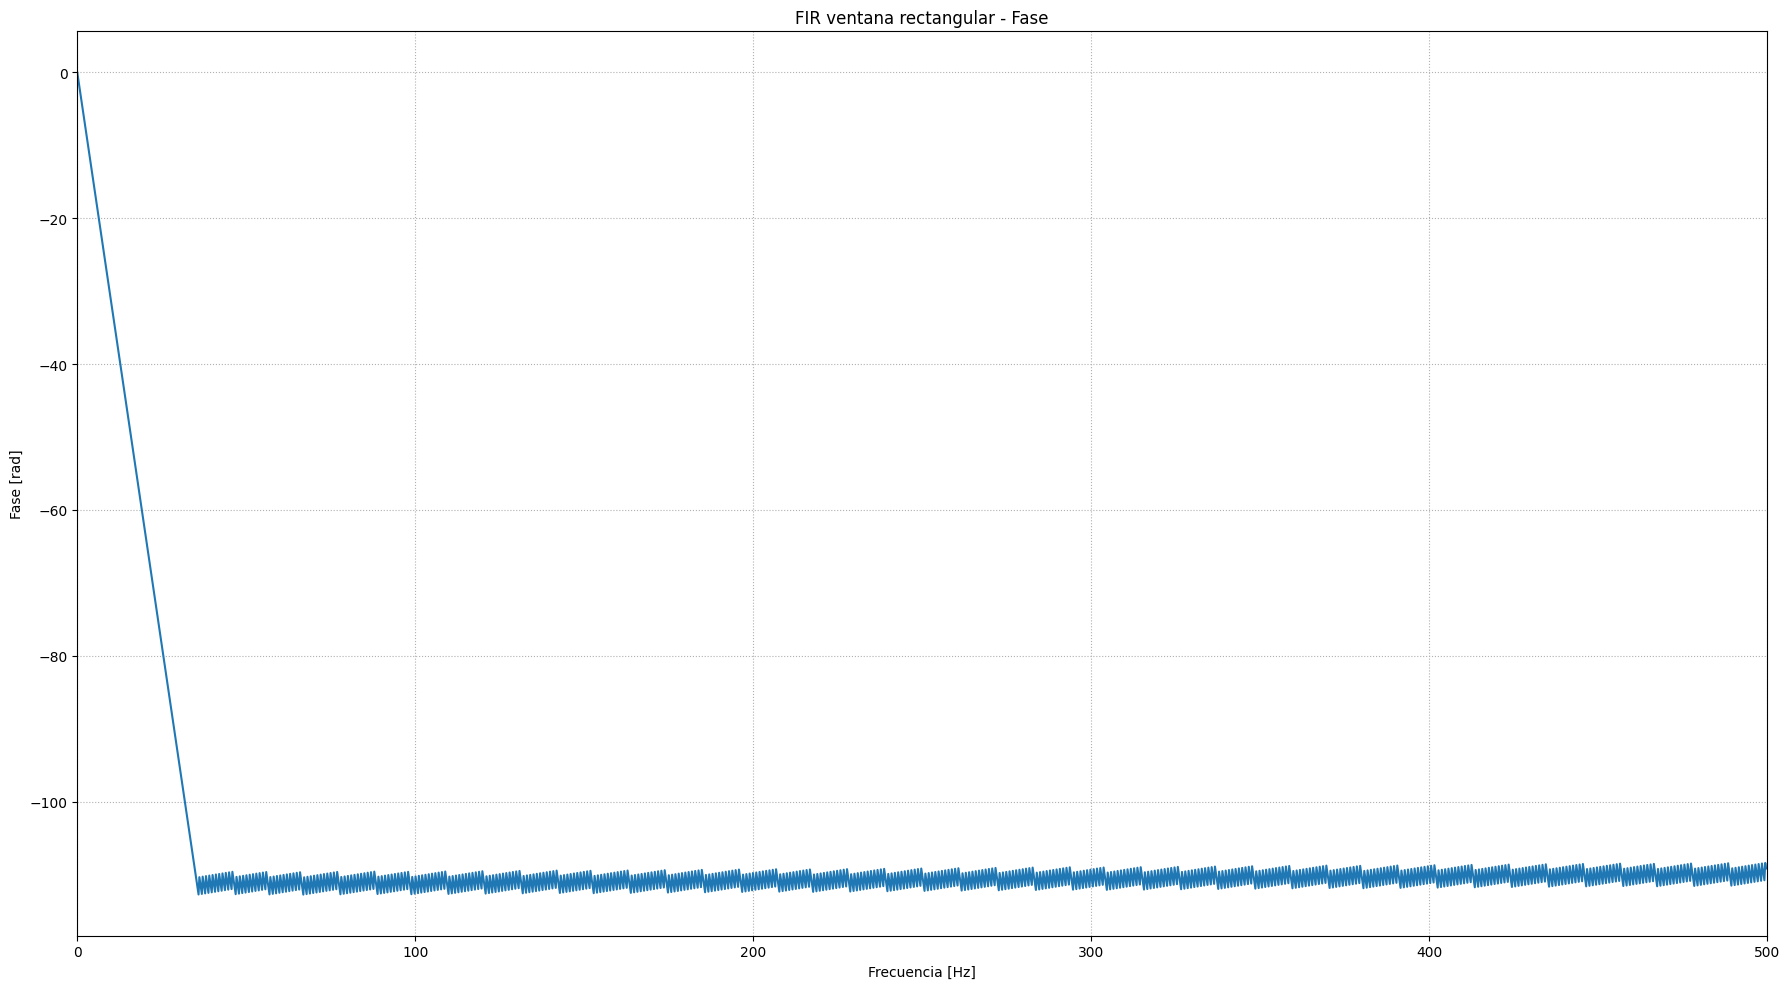

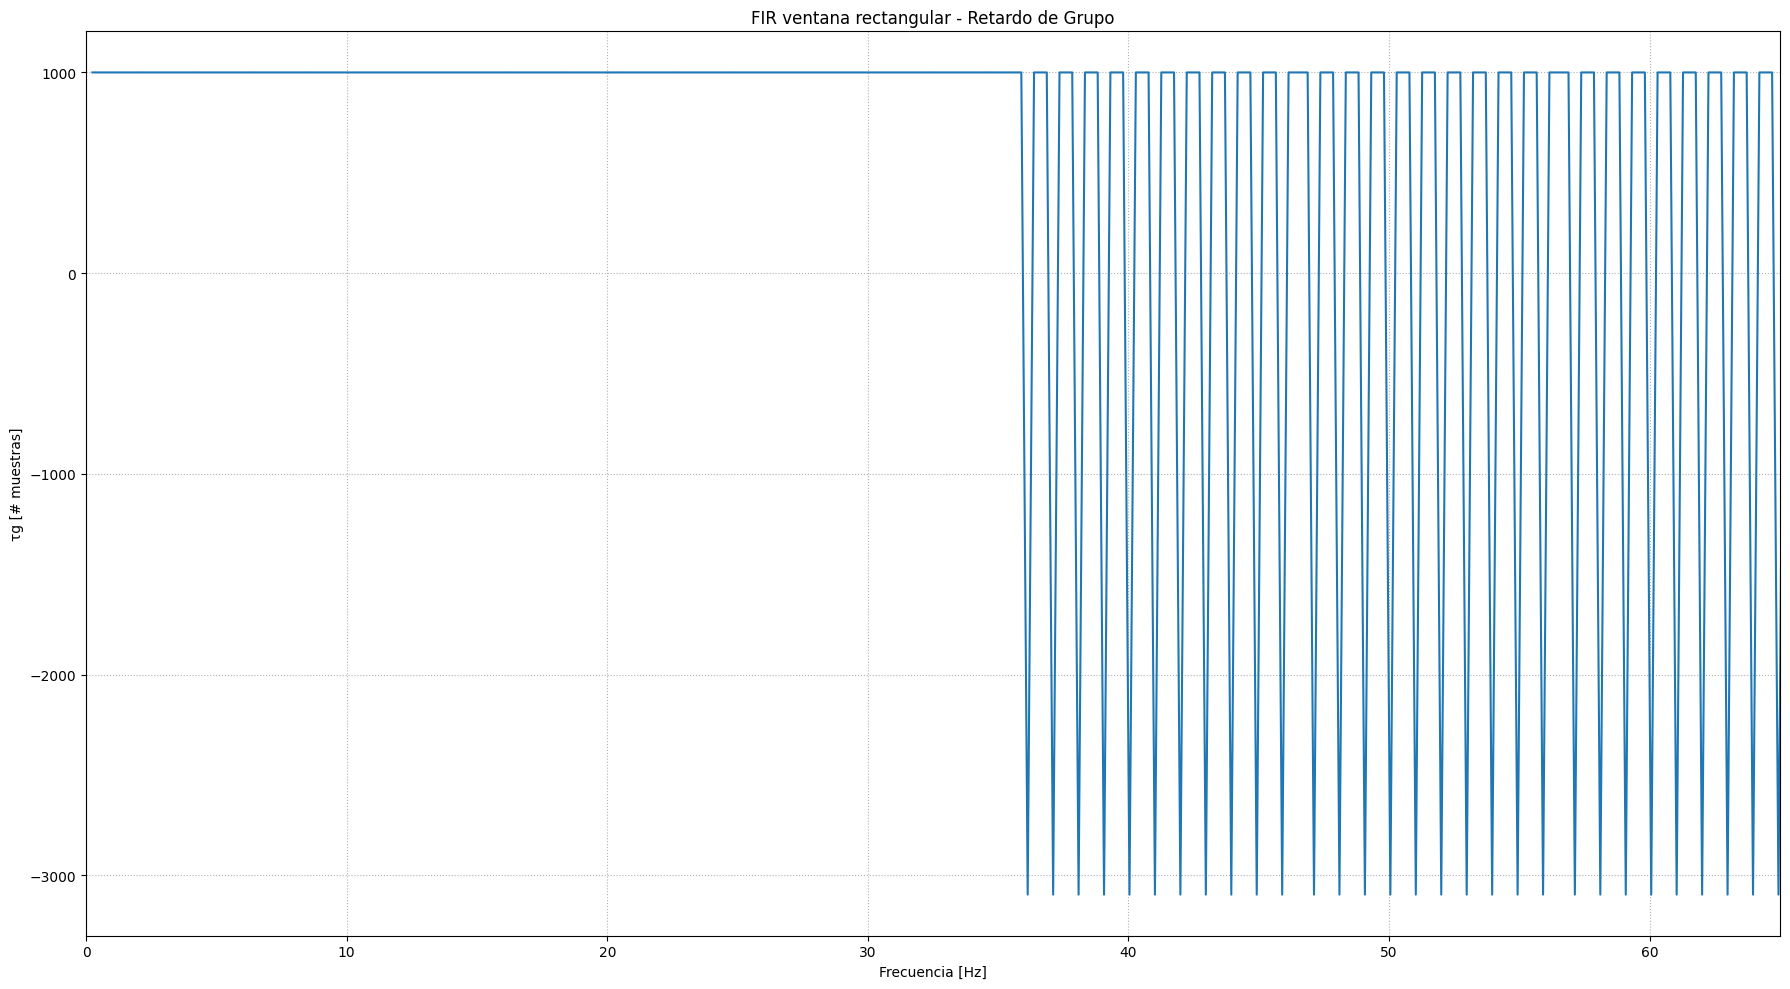

In [6]:
# %% GRAFICOS 
# VENTANA RECTANGULAR
plt.figure(figsize=(18,10))
plt.plot(w_fir, 20*np.log10(abs(h_fir)))
plt.title('FIR ventana rectangular - Respuesta en Magnitud')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('|H(ω)| [dB]')
plt.xlim(0, 500)
plt.grid(True, which='both', ls=':')
plot_plantilla('bandpass', wp, alpha_p*2, ws, alpha_s*2, fs)
plt.tight_layout() 
plt.show()

plt.figure(figsize=(18,10))
plt.plot(w_fir, fase_fir)
plt.title('FIR ventana rectangular - Fase')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Fase [rad]')
plt.xlim(0, 500)
plt.grid(True, which='both', ls=':')
plt.tight_layout() 
plt.show()

plt.figure(figsize=(18,10))
plt.plot(w_fir[1:], gd_fir)
plt.title('FIR ventana rectangular - Retardo de Grupo')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('τg [# muestras]')
plt.xlim(0, 65)
plt.grid(True, which='both', ls=':')
plt.tight_layout() 
plt.show()

2) <font color=red><u> **Cuadrados mínimos</u><font>**

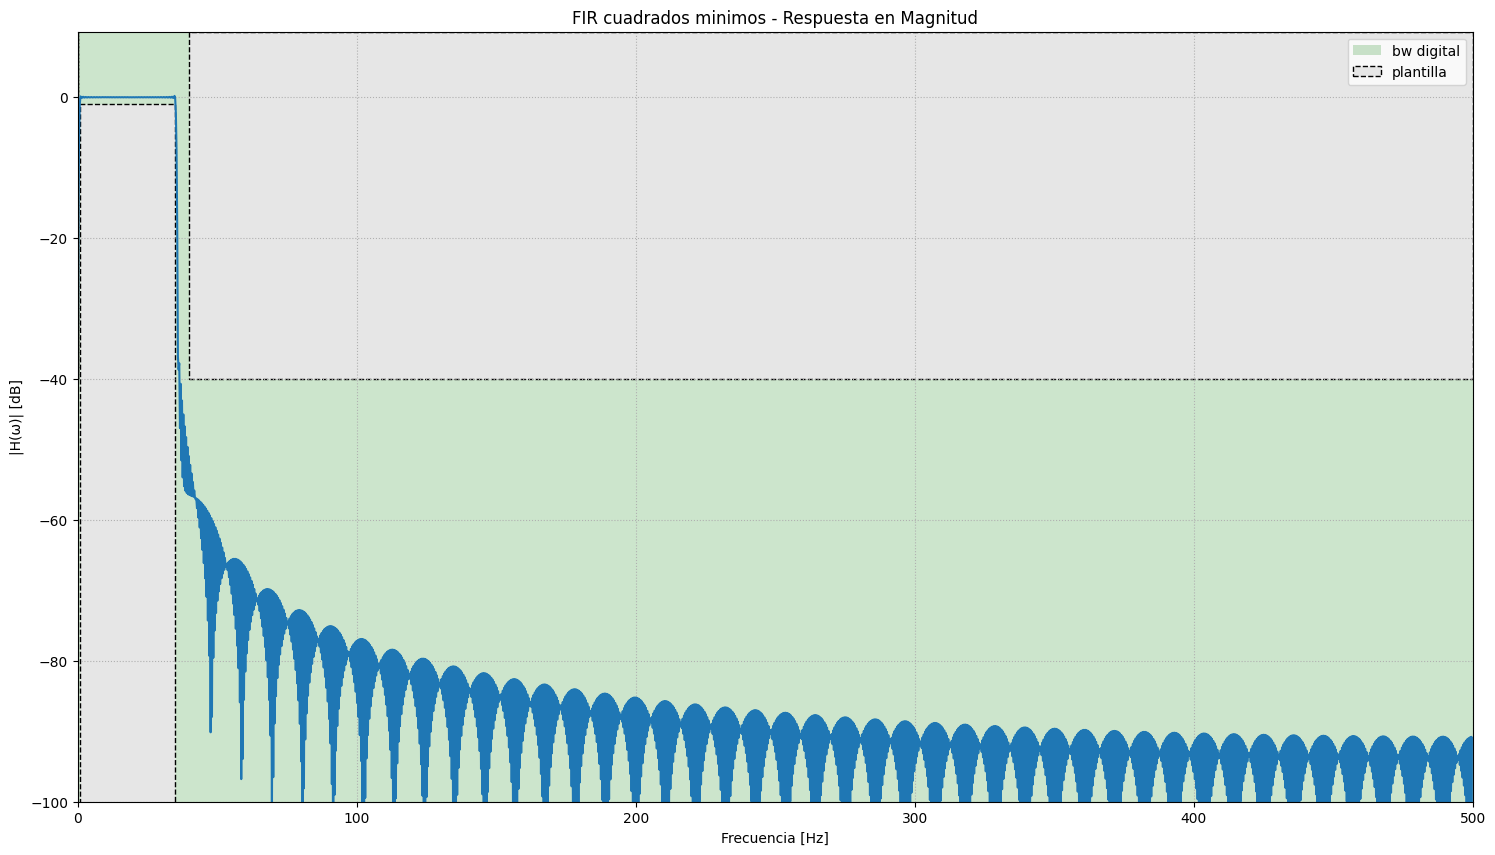

<Figure size 640x480 with 0 Axes>

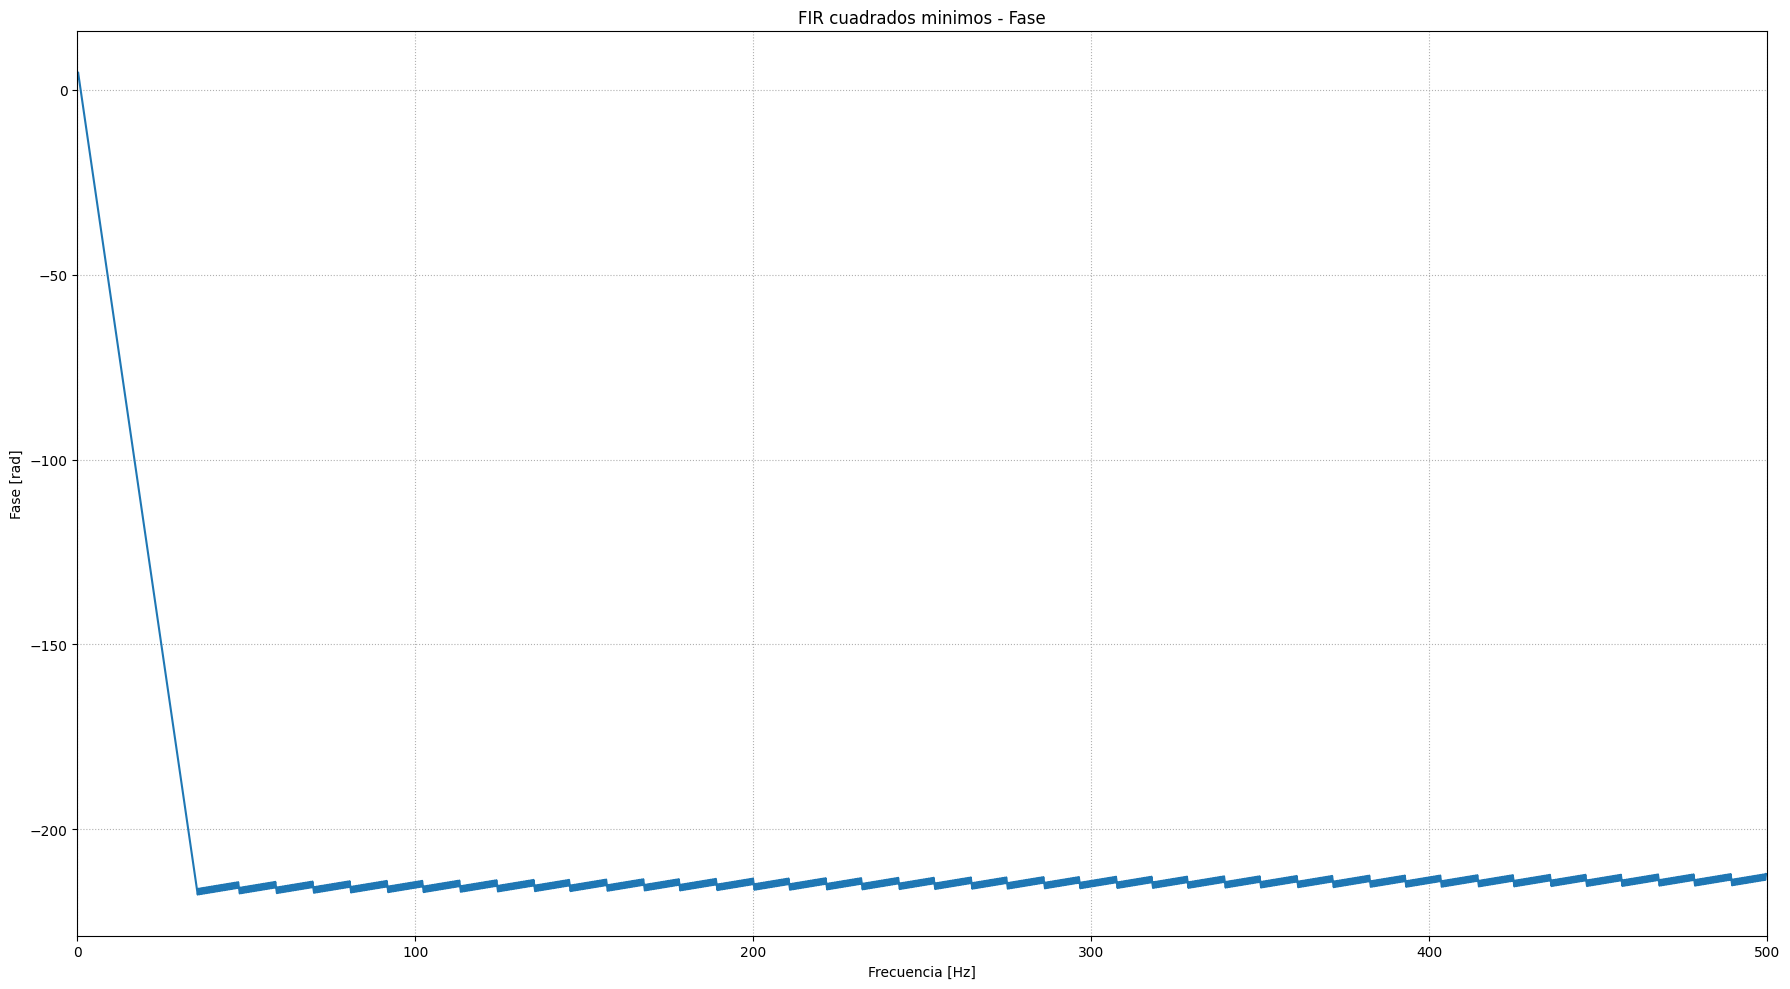

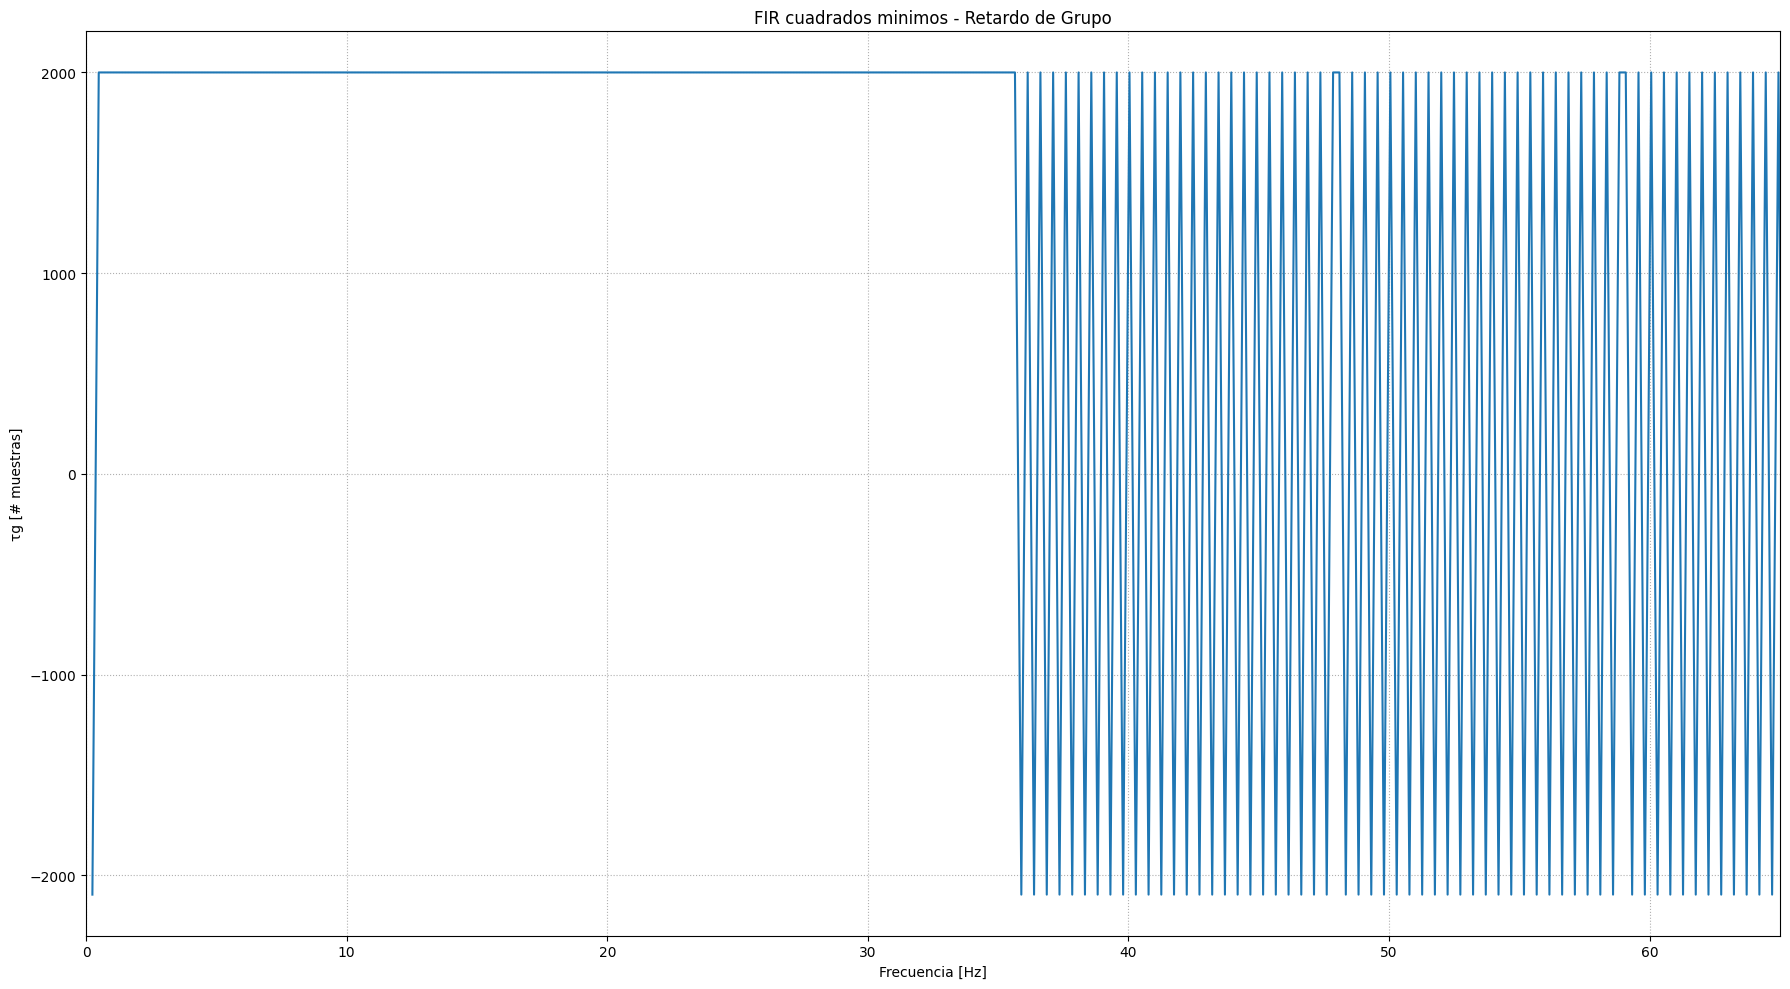

In [7]:
# CUADRADOS MINIMOS (LEAST - SQUARES)
plt.figure(figsize=(18,10))
plt.plot(w_ls, 20*np.log10(abs(h_ls)))
plt.title('FIR cuadrados minimos - Respuesta en Magnitud')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('|H(ω)| [dB]')
plt.xlim(0, 500)
plt.grid(True, which='both', ls=':')
plot_plantilla('bandpass', wp, alpha_p*2, ws, alpha_s*2, fs)
plt.tight_layout() 
plt.show()

plt.figure(figsize=(18,10))
plt.plot(w_ls, fase_ls)
plt.title('FIR cuadrados minimos - Fase')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Fase [rad]')
plt.xlim(0, 500)
plt.grid(True, which='both', ls=':')
plt.tight_layout() 
plt.show()

plt.figure(figsize=(18,10))
plt.plot(w_ls[1:], gd_ls)
plt.title('FIR cuadrados minimos - Retardo de Grupo')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('τg [# muestras]')
plt.xlim(0, 65)
plt.grid(True, which='both', ls=':')
plt.tight_layout() 
plt.show()

## <u> *ECG* en regiones de interes </u>

In [8]:
# %% CARGO EL ECG REAL

mat = sio.loadmat('./ecg.mat')
ecg_raw = mat['ecg_lead'].flatten()
N = len(ecg_raw)

# ---- Filtrado ----
ecg_filt_iir = sig.sosfiltfilt(mi_sos_butt, ecg_raw)
ecg_filt_fir = sig.filtfilt(fir_win, 1, ecg_raw)

### <font color=red><u> **ECG en zonas sin ruido</u><font>**

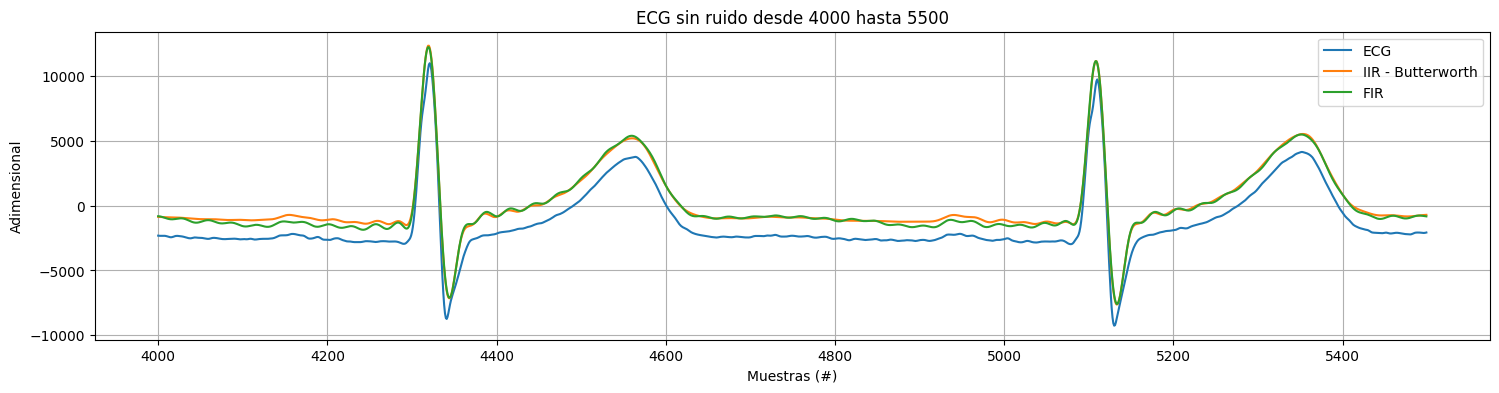

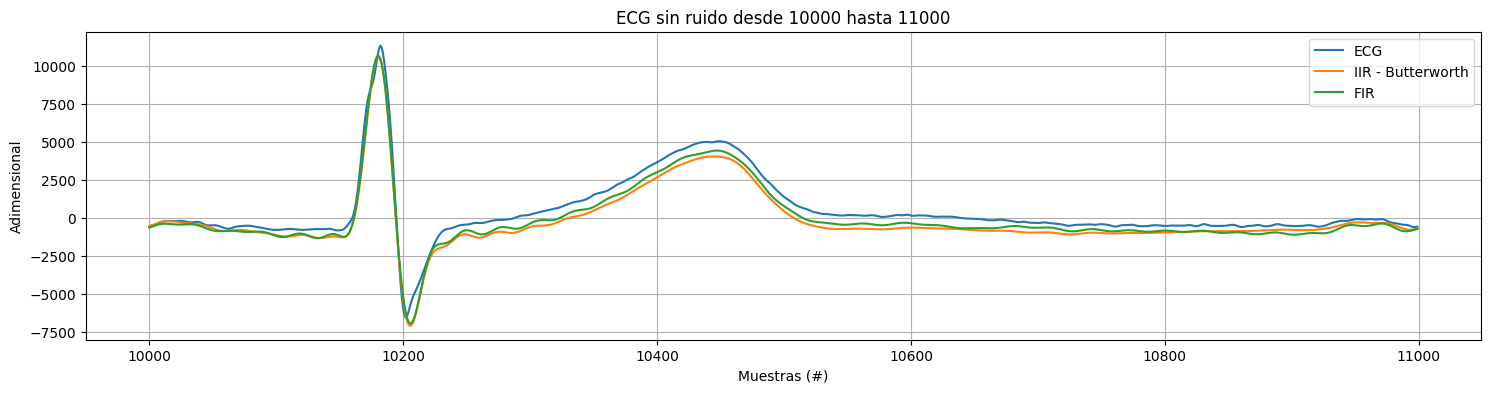

In [9]:
# %% GRAFICOS — ZONAS SIN RUIDO

regiones_sin_ruido = [
    [4000, 5500],
    [10000, 11000]
]

for r in regiones_sin_ruido:
    a,b = r
    t = np.arange(a,b)

    plt.figure(figsize=(18,4))
    plt.plot(t, ecg_raw[t], label="ECG")
    plt.plot(t, ecg_filt_iir[t], label="IIR - Butterworth")
    plt.plot(t, ecg_filt_fir[t], label="FIR")
    plt.title('ECG sin ruido desde ' + str(r[0]) + ' hasta ' + str(r[1]) )
    plt.ylabel('Adimensional')
    plt.xlabel('Muestras (#)')
    plt.legend()
    plt.grid()

### <font color=red><u> **ECG en zonas con ruido</u><font>**

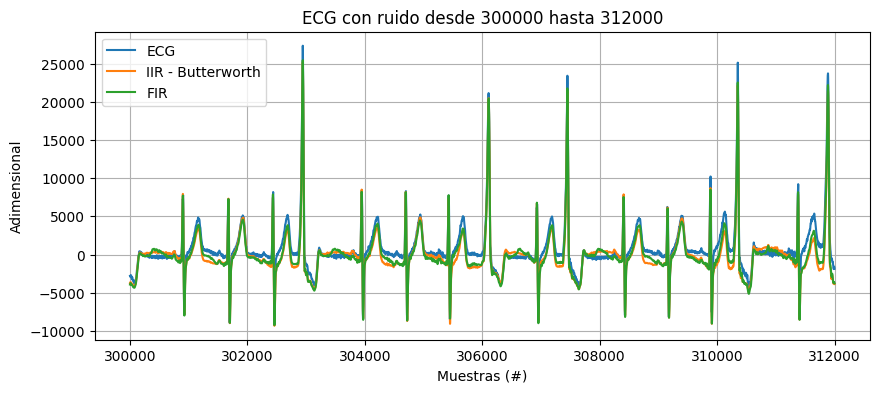

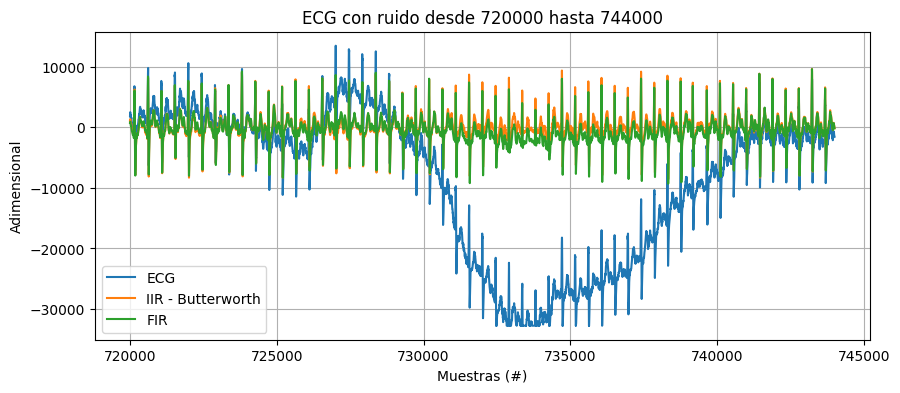

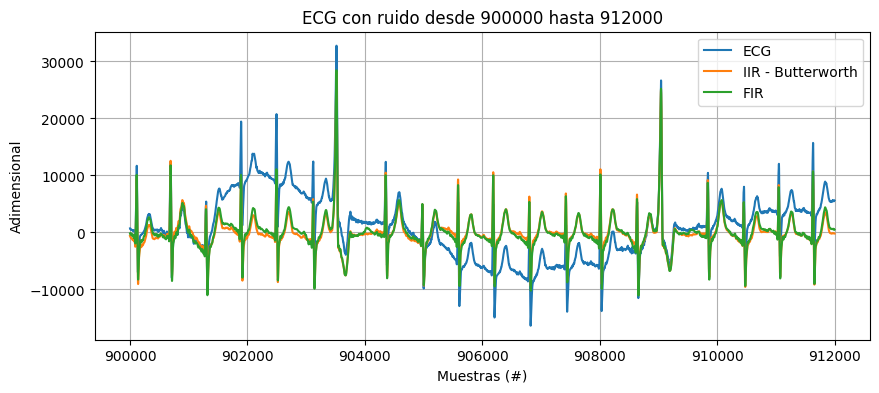

In [10]:
# %% GRAFICOS — ZONAS CON RUIDO

regiones_ruidosas = [
    (np.array([5, 5.2])*60*fs).astype(int),
    (np.array([12, 12.4])*60*fs).astype(int),
    (np.array([15, 15.2])*60*fs).astype(int)
]

for r in regiones_ruidosas:
    a,b = r
    t = np.arange(a,b)

    plt.figure(figsize=(10,4))
    plt.plot(t, ecg_raw[t], label="ECG")
    plt.plot(t, ecg_filt_iir[t], label="IIR - Butterworth")
    plt.plot(t, ecg_filt_fir[t], label="FIR")
    plt.title('ECG con ruido desde ' + str(r[0]) + ' hasta ' + str(r[1]) )
    plt.ylabel('Adimensional')
    plt.xlabel('Muestras (#)')
    plt.legend()
    plt.grid()

# III. **Conclusiones**

En este trabajo se diseñaron y evaluaron distintos filtros digitales *FIR* e *IIR* aplicados a un registro de ECG realizado durante una prueba de esfuerzo. El objetivo fue mitigar las principales fuentes de contaminación presentes en la señal: ruido de alta frecuencia (movimiento muscular y movimiento de electrodos) y desplazamiento de la línea de base (muy baja frecuencia asociado a respiración y movimiento).

Para el diseño de la plantilla de especificaciones basada en el ancho de banda del *ECG* estimado previamente (*TS5*) y en la morfología promedio de un complejo *QRS* normal. Esto permitió definir bandas de paso y rechazo coherentes, asegurando que los filtros preserven la energía dominante del *QRS* y de las ondas *P* y *T*, y al mismo tiempo que atenuen adecuadamente las componentes interferentes. 

Posteriormente, se diseñaron filtros utilizando diferentes métodos: 
- FIR: ventana rectangular y cuadrados mínimos
- IIR: Cauer y Chebyshev tipo I

El análisis de la respuesta en frecuencia evidenció diferencias importantes entre los distintos filtros. Los **IIR** presentan pendientes más pronunciadas, pero introducen no linealidad de fase, lo cual se observa en el retardo de grupo como una irregularidad. Por otro lado, los filtros **FIR** poseen fase lineal. 

La evaluación sobre regiones de interés con y sin ruido del ECG mostró que: 
- Los filtros atenuaron correctamente tanto el ruido de alta frecuencia como el movimiento de base.
- En regiones sin interferencias, los filtros *IIR* tienden a modificar levemente la envolvente del *ECG* debido a su fase no lineal, mientras que los *FIR* mantienen mayor fidelidad morfológica.
- En situaciones de ruido, los filtros con transición más abrupta (especialmente IIR Cauer) lograron suprimir mejor el ruido de alta frecuencia, pero pagando con oscilaciones en la fase.

Respecto a la calidad de los filtros, se puede concluir que: 
- Si se prioriza reducir lo máximo posible el ruido (para obtener detecciones de *QRS* más robustas), los IIR Cauer ofrecen mejor compromiso entre orden y selectividad.
- Si la prioridad es mantener la morfología del latido sin distorsiones temporales (para un mejor análisis clínico), los filtros FIR, especialmente el de cuadrados mínimos, resultan más apropiados debido a su fase lineal.

En conclusión, considerando que el *ECG* es una señal altamente sensible a distorsiones de fase, la opción más equilibrada para este trabajo fue el filtro FIR por cuadrados mínimos, que logra una buena atenuación del ruido preservando adecuadamente la forma del complejo *QRS* y las ondas *P* y *Q*, sin introducir desplazamientos temporales significativos. 